# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        input_shape=[200, 200, 3]
    )
)

### Step 2 - Pooling

In [ ]:
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
    )
)

### Adding a second convolutional layer

In [ ]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='relu'
    )
)

cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
    )
)

### Adding a third convolutional layer

In [ ]:
cnn.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='relu'
    )
)

cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
    )
)

### Step 3 - Flattening

In [ ]:
cnn.add(
    tf.keras.layers.Flatten()
)

### Step 4 - Full Connection

In [ ]:
cnn.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

### Step 5 - Output Layer

In [ ]:
cnn.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)

Epoch 1/25
250/250 [==============================] - 210s 840ms/step - loss: 0.6919 - accuracy: 0.5730 - val_loss: 0.7124 - val_accuracy: 0.5885
Epoch 2/25
250/250 [==============================] - 211s 845ms/step - loss: 0.6030 - accuracy: 0.6719 - val_loss: 0.5691 - val_accuracy: 0.7145
Epoch 3/25
250/250 [==============================] - 202s 809ms/step - loss: 0.5321 - accuracy: 0.7309 - val_loss: 0.4915 - val_accuracy: 0.7625
Epoch 4/25
250/250 [==============================] - 191s 765ms/step - loss: 0.4844 - accuracy: 0.7684 - val_loss: 0.4705 - val_accuracy: 0.7740
Epoch 5/25
250/250 [==============================] - 190s 760ms/step - loss: 0.4506 - accuracy: 0.7887 - val_loss: 0.4619 - val_accuracy: 0.7895
Epoch 6/25
250/250 [==============================] - 190s 758ms/step - loss: 0.4291 - accuracy: 0.8027 - val_loss: 0.4529 - val_accuracy: 0.7885
Epoch 7/25
250/250 [==============================] - 959s 4s/step - loss: 0.4018 - accuracy: 0.8145 - val_loss: 0.4192 - va

### Saving the model

In [ ]:
cnn.save('model_95.h5')

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [ ]:
def predict_result(img_name: str):
    test_image = image.load_img(f'dataset/single_prediction/{img_name}', target_size = (200, 200))
    test_image = image.img_to_array(test_image)
    x=test_image
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    if result[0][0] == 1:
        print('This is a DOG!')
    else:
        print('This is a CAT!')
    plt.imshow(x/255.)
    plt.show()
    print('-' * 20)

This is a DOG!


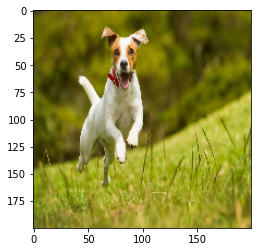

--------------------
This is a DOG!


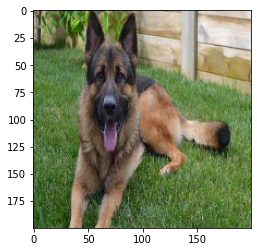

--------------------
This is a DOG!


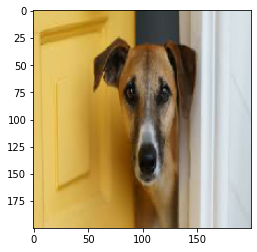

--------------------
This is a DOG!


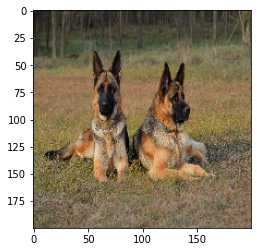

--------------------
This is a CAT!


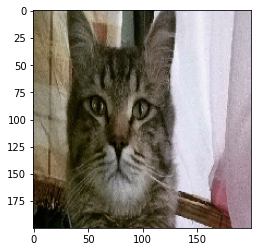

--------------------
This is a CAT!


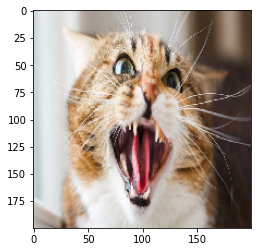

--------------------
This is a CAT!


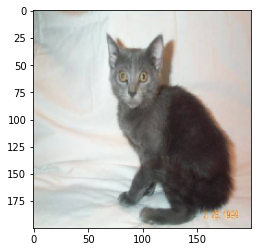

--------------------
This is a DOG!


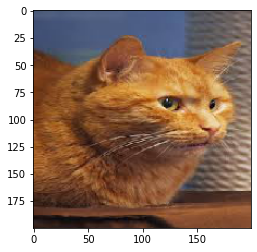

--------------------
This is a DOG!


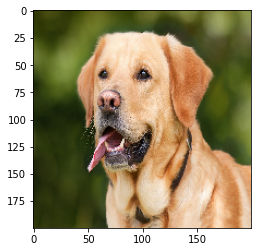

--------------------
This is a DOG!


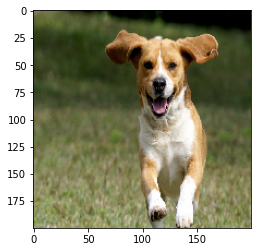

--------------------
This is a CAT!


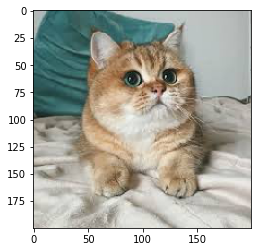

--------------------
This is a CAT!


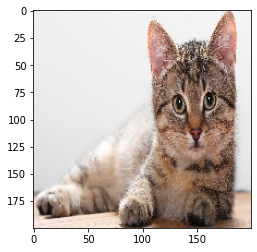

--------------------


In [ ]:
for file in os.listdir('dataset/single_prediction'):
    predict_result(file)

This is a CAT!


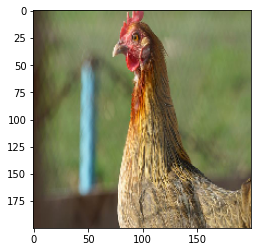

--------------------


In [ ]:
predict_result('123.jpg')